# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import sys

sys.path.append('../../..')

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

642

In [3]:
# Convert list to dataframe
city_dict = {'City':cities}
city_data = pd.DataFrame(city_dict)

# Add columns to dataframe
city_data['Cloudiness'] = ''
city_data['Country'] = ''
city_data['Date'] = ''
city_data['Humidity'] = ''
city_data['Lat'] = ''
city_data['Lng'] = ''
city_data['Max Temp'] = ''
city_data['Wind Speed'] = ''

city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vardo,,,,,,,,
1,Rikitea,,,,,,,,
2,Barrow,,,,,,,,
3,Illoqqortoormiut,,,,,,,,
4,Nguiu,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

print('Beginning Data Retrieval')
print('------------------------------')

# Use for testing
#for _ in range(20):

# Retrieve data for each city using 'for' loop
for _ in range(len(city_data)):
    
    # Set additional parameter values
    params = {'appid':weather_key,
          'q':city_data.iloc[_,0],
          'units':'imperial'}
    
    print(f'Processing Record {_+1} of {len(city_data)}: {city_data.iloc[_,0]}')
    
    # Send request to OpenWeather API
    weather = requests.get(base_url, params)
    
    # Print url
    print(f'\t{weather.url}')
    
    # Convert to json format
    weather = weather.json()
    
    # Print formatted result to determine location of target information
    #print(json.dumps(weather, indent=4))
    
    # Retrieve relevant data and populate dataframe. 
    # 'try' and 'except' used for handling possible errors
    try:
        #city = weather['name']
        city_data.loc[_, 'Cloudiness'] = weather['clouds']['all']
        city_data.loc[_, 'Country'] = weather['sys']['country']
        city_data.loc[_, 'Date'] = weather['dt']
        city_data.loc[_, 'Humidity'] = weather['main']['humidity']
        city_data.loc[_, 'Lat'] = weather['coord']['lat']
        city_data.loc[_, 'Lng'] = weather['coord']['lon']
        city_data.loc[_, 'Max Temp'] = weather['main']['temp_max']
        city_data.loc[_, 'Wind Speed'] = weather['wind']['speed']  
    except (KeyError, IndexError):
        print(f'\tNo data found for {city_data.iloc[_,0]}')
        
    # Pause code one second after each request to avoid exceeding rate limit
    time.sleep(1)

Beginning Data Retrieval
------------------------------
Processing Record 1 of 642: Vardo
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Vardo&units=imperial
Processing Record 2 of 642: Rikitea
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Rikitea&units=imperial
Processing Record 3 of 642: Barrow
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Barrow&units=imperial
Processing Record 4 of 642: Illoqqortoormiut
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Illoqqortoormiut&units=imperial
	No data found for Illoqqortoormiut
Processing Record 5 of 642: Nguiu
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Nguiu&units=imperial
	No data found for Nguiu
Processing Record 6 of 642: Hofn
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Hofn&units=im

Processing Record 54 of 642: Kavaratti
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Kavaratti&units=imperial
Processing Record 55 of 642: Cloquet
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Cloquet&units=imperial
Processing Record 56 of 642: Novopokrovka
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Novopokrovka&units=imperial
Processing Record 57 of 642: Bethel
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Bethel&units=imperial
Processing Record 58 of 642: Perth
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Perth&units=imperial
Processing Record 59 of 642: Hithadhoo
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Hithadhoo&units=imperial
Processing Record 60 of 642: Karasjok
	http://api.openweathermap.org/data/2.5/weather?appid=1e

Processing Record 106 of 642: Kaura Namoda
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Kaura+Namoda&units=imperial
Processing Record 107 of 642: Cap Malheureux
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Cap+Malheureux&units=imperial
Processing Record 108 of 642: Pisco
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Pisco&units=imperial
Processing Record 109 of 642: Longyearbyen
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Longyearbyen&units=imperial
Processing Record 110 of 642: Vaitape
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Vaitape&units=imperial
Processing Record 111 of 642: Saint Anthony
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Saint+Anthony&units=imperial
Processing Record 112 of 642: Saleaula
	http://api.openwea

Processing Record 159 of 642: Beroroha
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Beroroha&units=imperial
Processing Record 160 of 642: Attawapiskat
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Attawapiskat&units=imperial
	No data found for Attawapiskat
Processing Record 161 of 642: Monte Alegre De Sergipe
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Monte+Alegre+De+Sergipe&units=imperial
Processing Record 162 of 642: Tiznit
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Tiznit&units=imperial
Processing Record 163 of 642: Okulovka
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Okulovka&units=imperial
Processing Record 164 of 642: Sainte-Marie
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Sainte-Marie&units=imperial
Processing Rec

Processing Record 212 of 642: Bandarbeyla
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Bandarbeyla&units=imperial
Processing Record 213 of 642: Vestmanna
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Vestmanna&units=imperial
Processing Record 214 of 642: College
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=College&units=imperial
Processing Record 215 of 642: Smolenka
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Smolenka&units=imperial
Processing Record 216 of 642: Chumikan
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Chumikan&units=imperial
Processing Record 217 of 642: Norman Wells
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Norman+Wells&units=imperial
Processing Record 218 of 642: Pokhara
	http://api.openweathermap.org/data/

Processing Record 266 of 642: Esperance
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Esperance&units=imperial
Processing Record 267 of 642: Nuuk
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Nuuk&units=imperial
Processing Record 268 of 642: Ngukurr
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Ngukurr&units=imperial
	No data found for Ngukurr
Processing Record 269 of 642: Colonia
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Colonia&units=imperial
Processing Record 270 of 642: Naze
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Naze&units=imperial
Processing Record 271 of 642: Kaitangata
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Kaitangata&units=imperial
Processing Record 272 of 642: Laiyang
	http://api.openweathermap.org/data/2

Processing Record 319 of 642: Gigmoto
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Gigmoto&units=imperial
Processing Record 320 of 642: Kracheh
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Kracheh&units=imperial
	No data found for Kracheh
Processing Record 321 of 642: Anito
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Anito&units=imperial
Processing Record 322 of 642: Yerbogachen
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Yerbogachen&units=imperial
Processing Record 323 of 642: Viedma
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Viedma&units=imperial
Processing Record 324 of 642: Sumenep
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Sumenep&units=imperial
Processing Record 325 of 642: Roald
	http://api.openweathermap.org/data

Processing Record 372 of 642: Poso
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Poso&units=imperial
Processing Record 373 of 642: Vila Do Maio
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Vila+Do+Maio&units=imperial
Processing Record 374 of 642: Matara
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Matara&units=imperial
Processing Record 375 of 642: Mullaitivu
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Mullaitivu&units=imperial
	No data found for Mullaitivu
Processing Record 376 of 642: Tautira
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Tautira&units=imperial
Processing Record 377 of 642: Siyabuswa
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Siyabuswa&units=imperial
Processing Record 378 of 642: Rio Gallegos
	http://api.ope

Processing Record 425 of 642: Saldanha
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Saldanha&units=imperial
Processing Record 426 of 642: Karatau
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Karatau&units=imperial
Processing Record 427 of 642: Storm Lake
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Storm+Lake&units=imperial
Processing Record 428 of 642: Maloshuyka
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Maloshuyka&units=imperial
	No data found for Maloshuyka
Processing Record 429 of 642: Korla
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Korla&units=imperial
	No data found for Korla
Processing Record 430 of 642: Prattville
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Prattville&units=imperial
Processing Record 431 of 642:

Processing Record 478 of 642: Kazachinskoye
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Kazachinskoye&units=imperial
Processing Record 479 of 642: Port-Cartier
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Port-Cartier&units=imperial
Processing Record 480 of 642: Sobolevo
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Sobolevo&units=imperial
Processing Record 481 of 642: Choma
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Choma&units=imperial
Processing Record 482 of 642: Duku
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Duku&units=imperial
Processing Record 483 of 642: Marang
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Marang&units=imperial
	No data found for Marang
Processing Record 484 of 642: Komsomolskiy
	http://api.openwea

Processing Record 531 of 642: Awbari
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Awbari&units=imperial
Processing Record 532 of 642: Sorong
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Sorong&units=imperial
Processing Record 533 of 642: Guerrero Negro
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Guerrero+Negro&units=imperial
Processing Record 534 of 642: Gidam
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Gidam&units=imperial
Processing Record 535 of 642: Monrovia
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Monrovia&units=imperial
Processing Record 536 of 642: Castrillon
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Castrillon&units=imperial
Processing Record 537 of 642: Hunterville
	http://api.openweathermap.org/data/2.5/weat

Processing Record 585 of 642: Bow Island
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Bow+Island&units=imperial
Processing Record 586 of 642: Ahmadpur East
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Ahmadpur+East&units=imperial
Processing Record 587 of 642: Hervey Bay
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Hervey+Bay&units=imperial
Processing Record 588 of 642: Moussoro
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Moussoro&units=imperial
Processing Record 589 of 642: Kaoma
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Kaoma&units=imperial
Processing Record 590 of 642: Addi Ugri
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Addi+Ugri&units=imperial
	No data found for Addi Ugri
Processing Record 591 of 642: Tilichiki
	http

Processing Record 639 of 642: Atchison
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Atchison&units=imperial
Processing Record 640 of 642: Bosaso
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Bosaso&units=imperial
Processing Record 641 of 642: Chikhli
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=Chikhli&units=imperial
Processing Record 642 of 642: San Jose
	http://api.openweathermap.org/data/2.5/weather?appid=1ed3c2381d390cf211c6f890a445b64f&q=San+Jose&units=imperial


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Dislay resulting dataframe
city_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vardo,1,US,1572725864,43,39.62,-77.74,54,4.7
1,Rikitea,57,PF,1572725790,80,-23.12,-134.97,70.5,15.3
2,Barrow,0,AR,1572725948,60,-38.31,-60.23,59.7,12.1
3,Illoqqortoormiut,,,,,,,,
4,Nguiu,,,,,,,,
5,Hofn,100,IS,1572725829,89,64.25,-15.21,40.03,32.48
6,Comodoro Rivadavia,3,AR,1572725952,28,-45.87,-67.48,71.6,17.22
7,Bonavista,45,CA,1572725953,75,48.65,-53.11,44.01,4
8,Flores,16,BR,1572725954,37,-7.86,-37.97,85.14,19.3
9,Cape Town,40,ZA,1572725766,82,-33.93,18.42,66,10.29


In [6]:
# Replace empty values with 'Nan'
city_data = city_data.replace('',np.nan)

# Remove null values (i.e., cities not found)
city_data = city_data.dropna()

# Reset index of dataframe
city_data = city_data.reset_index(drop=True)

# Convert unix timestamps to dates
city_data['Date'] = pd.to_datetime(city_data['Date'], unit='s')
city_data['Date'] = city_data['Date'].map(lambda x: x.strftime('%m/%d/%y'))

city_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vardo,1.0,US,11/02/19,43.0,39.62,-77.74,54.00,4.70
1,Rikitea,57.0,PF,11/02/19,80.0,-23.12,-134.97,70.50,15.30
2,Barrow,0.0,AR,11/02/19,60.0,-38.31,-60.23,59.70,12.10
3,Hofn,100.0,IS,11/02/19,89.0,64.25,-15.21,40.03,32.48
4,Comodoro Rivadavia,3.0,AR,11/02/19,28.0,-45.87,-67.48,71.60,17.22
5,Bonavista,45.0,CA,11/02/19,75.0,48.65,-53.11,44.01,4.00
6,Flores,16.0,BR,11/02/19,37.0,-7.86,-37.97,85.14,19.30
7,Cape Town,40.0,ZA,11/02/19,82.0,-33.93,18.42,66.00,10.29
8,Sambava,100.0,MG,11/02/19,99.0,-14.27,50.17,70.20,1.25
9,Lebu,20.0,ET,11/02/19,48.0,8.96,38.73,60.80,6.93


In [7]:
# Export dataframe to a csv file
city_data.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

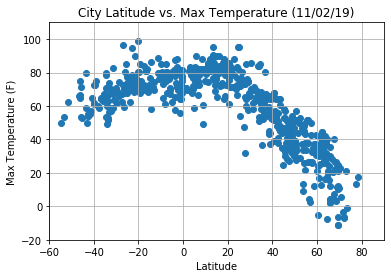

In [8]:
# Create scatter plot of maximum temperature as a fuction of latitude
plt.scatter(city_data['Lat'], city_data['Max Temp'])

# Define title and axis labels
plt.title(f"City Latitude vs. Max Temperature ({city_data.loc[0,'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Max Temp'].min(),-1) - (city_data['Max Temp'].min() % 2 >= 0) * 10
ylim_max = round(city_data['Max Temp'].max(),-1) + (city_data['Max Temp'].max() % 2 >= 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

#Show grid
plt.grid()

# Save plot as a png file
plt.savefig('output/latitude-max_temp.png')

# Show figure
plt.show()

#### Latitude vs. Humidity Plot

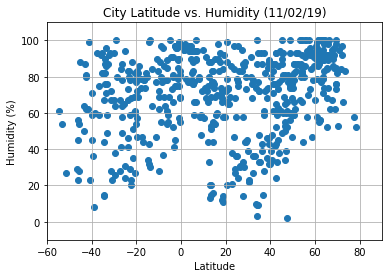

In [9]:
# Create scatter plot of humidity as a fuction of latitude
plt.scatter(city_data['Lat'], city_data['Humidity'])

# Define title and axis labels
plt.title(f"City Latitude vs. Humidity ({city_data.loc[0,'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Humidity'].min(),-1) - (city_data['Humidity'].min() % 2 >= 0) * 10
ylim_max = round(city_data['Humidity'].max(),-1) + (city_data['Humidity'].max() % 2 >= 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

#Show grid
plt.grid()

# Save plot as a png file
plt.savefig('output/latitude-humidity.png')

# Show figure
plt.show()

#### Latitude vs. Cloudiness Plot

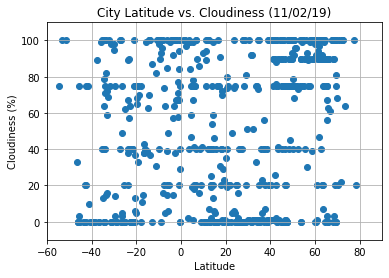

In [10]:
# Create scatter plot of cloudiness as a fuction of latitude
plt.scatter(city_data['Lat'], city_data['Cloudiness'])

# Define title and axis labels
plt.title(f"City Latitude vs. Cloudiness ({city_data.loc[0,'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Cloudiness'].min(),-1) - (city_data['Cloudiness'].min() % 2 >= 0) * 10
ylim_max = round(city_data['Cloudiness'].max(),-1) + (city_data['Cloudiness'].max() % 2 >= 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

#Show grid
plt.grid()

# Save plot as a png file
plt.savefig('output/latitude-cloudiness.png')

# Show figure
plt.show()

#### Latitude vs. Wind Speed Plot

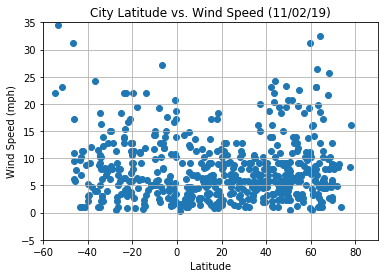

In [11]:
# Create scatter plot of maximum temperature as a fuction of latitude
plt.scatter(city_data['Lat'], city_data['Wind Speed'])

# Define title and axis labels
plt.title(f"City Latitude vs. Wind Speed ({city_data.loc[0,'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Wind Speed'].min(),-1) - (city_data['Wind Speed'].min() % 2 >= 0) * 5
ylim_max = round(city_data['Wind Speed'].max(),-1) + (city_data['Wind Speed'].max() % 2 >= 0) * 5
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

#Show grid
plt.grid()

# Save plot as a png file
plt.savefig('output/latitude-wind_speed.png')

# Show figure
plt.show()